In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
sb.set(style='ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/content/athlete_events.csv', sep=",")

In [3]:
# Первые 5 строк датасета
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Размер датасета - 271116 строк, 15 колонок
data.shape

(271116, 15)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 271116


In [6]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
#Проверим на пустые значения
for column in data.columns:
    temp_null_count = data[data[column].isnull()].shape[0]
    print('{} - {}'.format(column,temp_null_count))

ID - 0
Name - 0
Sex - 0
Age - 9474
Height - 60171
Weight - 62875
Team - 0
NOC - 0
Games - 0
Year - 0
Season - 0
City - 0
Sport - 0
Event - 0
Medal - 231333


In [9]:
#основные статические характеритсики набора данных
data.describe()


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
# Определим уникальные значения для целевого признака
data['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [11]:
# Определим уникальные значения для целевого признака
data['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [12]:
# Определим уникальные значения для целевого признака
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [13]:
# Определим уникальные значения для целевого признака
data['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [14]:
# Определим уникальные значения для целевого признака
data['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [15]:
# Определим уникальные значения для целевого признака
data['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])

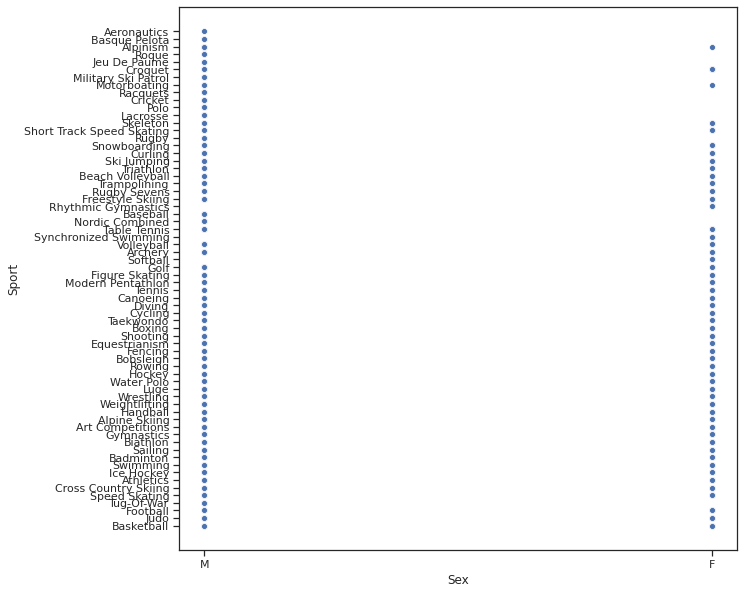

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.scatterplot(ax=ax, x='Sex', y='Sport', data=data)

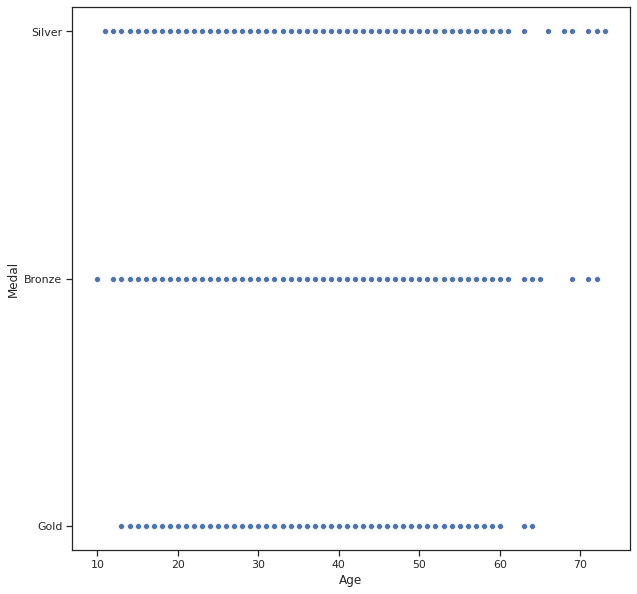

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.scatterplot(ax=ax, x='Age', y='Medal', data=data)

In [18]:
data['Age'].unique()

array([24., 23., 34., 21., 25., 27., 31., 33., 18., 26., 22., 30., 32.,
       28., 54., 20., 17., 43., 47., 29., 41., 45., 49., 53., 57., nan,
       19., 38., 35., 16., 37., 15., 42., 46., 40., 36., 14., 39., 48.,
       52., 44., 55., 50., 71., 63., 51., 58., 13., 60., 75., 65., 56.,
       64., 68., 84., 12., 72., 59., 61., 70., 74., 62., 67., 69., 73.,
       66., 11., 76., 88., 96., 80., 10., 81., 77., 97.])

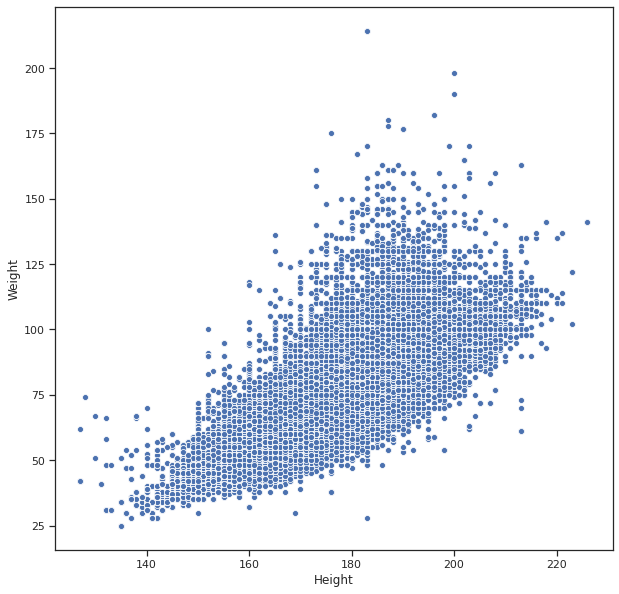

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.scatterplot(ax=ax, x='Height', y='Weight', data=data)

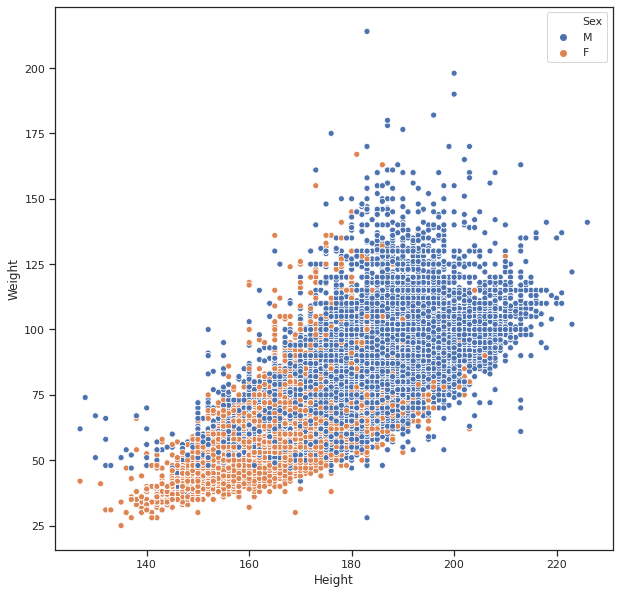

In [20]:

fig, ax = plt.subplots(figsize=(10,10)) 
sb.scatterplot(ax=ax, x='Height', y='Weight', data=data, hue='Sex')

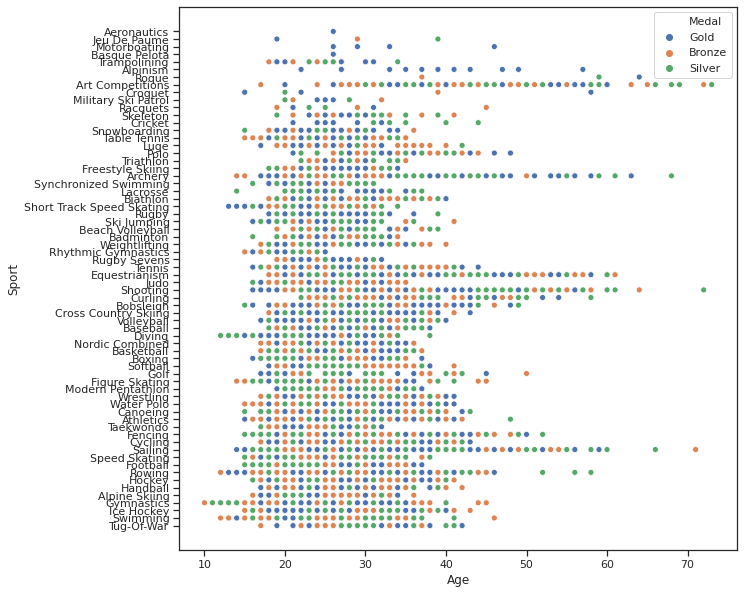

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.scatterplot(ax=ax, x='Age', y='Sport', data=data, hue='Medal')

In [0]:
data=data.fillna(0)

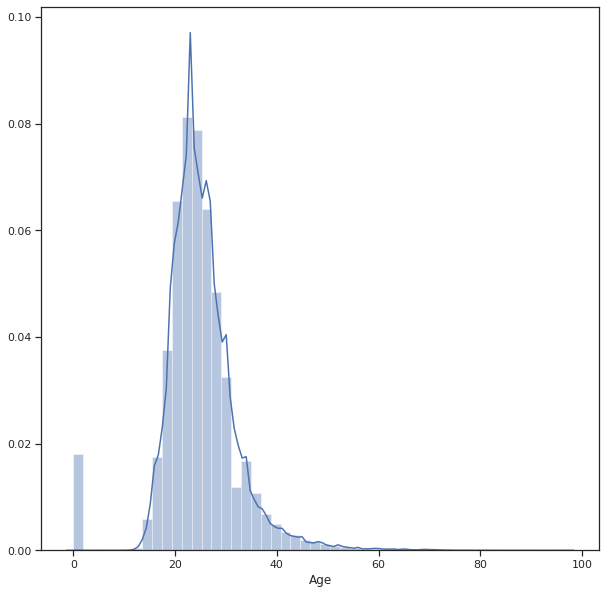

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.distplot(data['Age'])


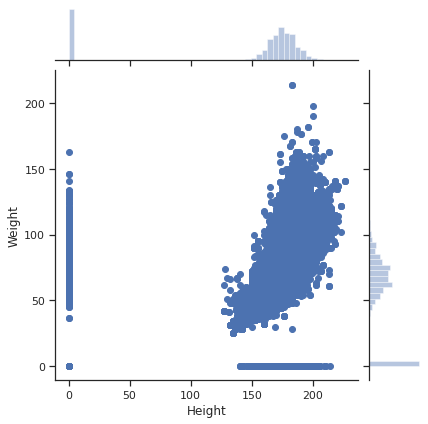

In [24]:

sb.jointplot(x='Height', y='Weight', data=data)

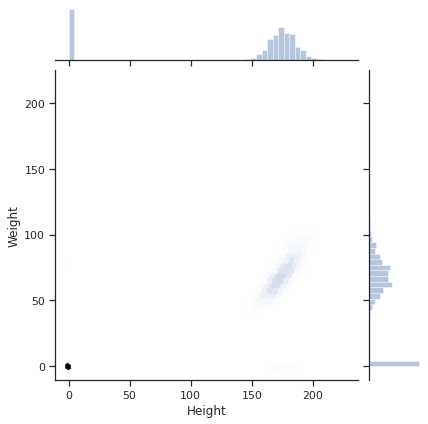

In [25]:
sb.jointplot(x='Height', y='Weight', data=data, kind="hex")

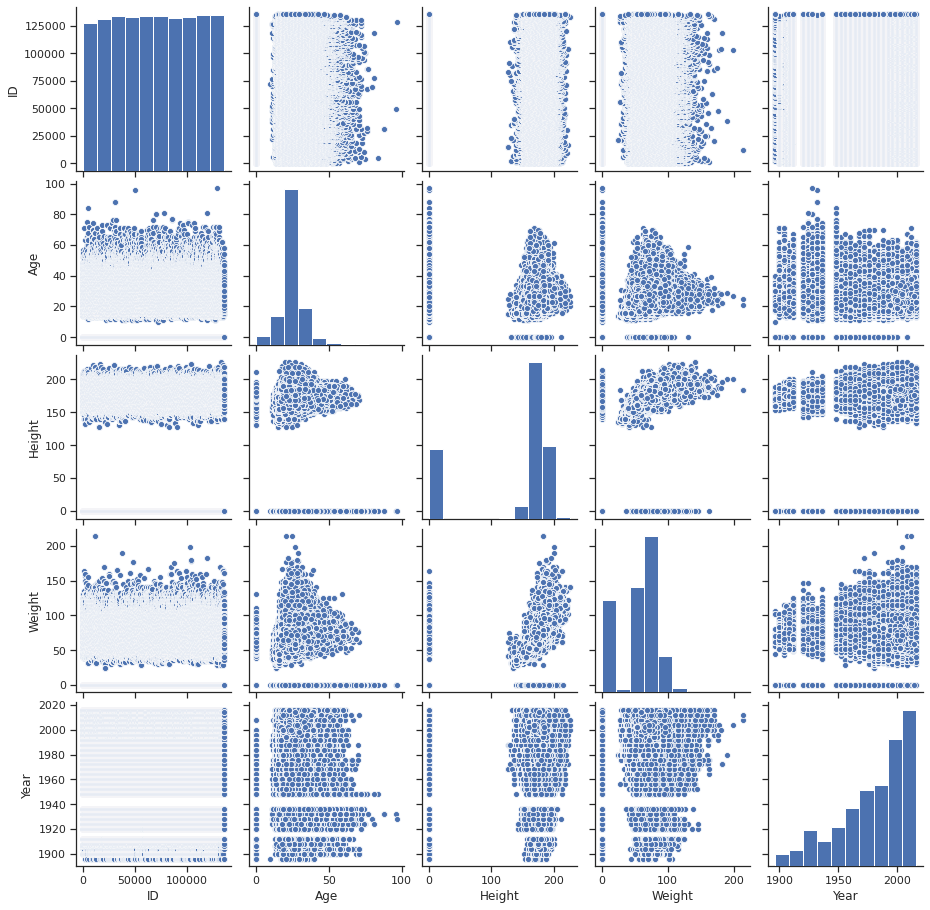

In [26]:
sb.pairplot(data)

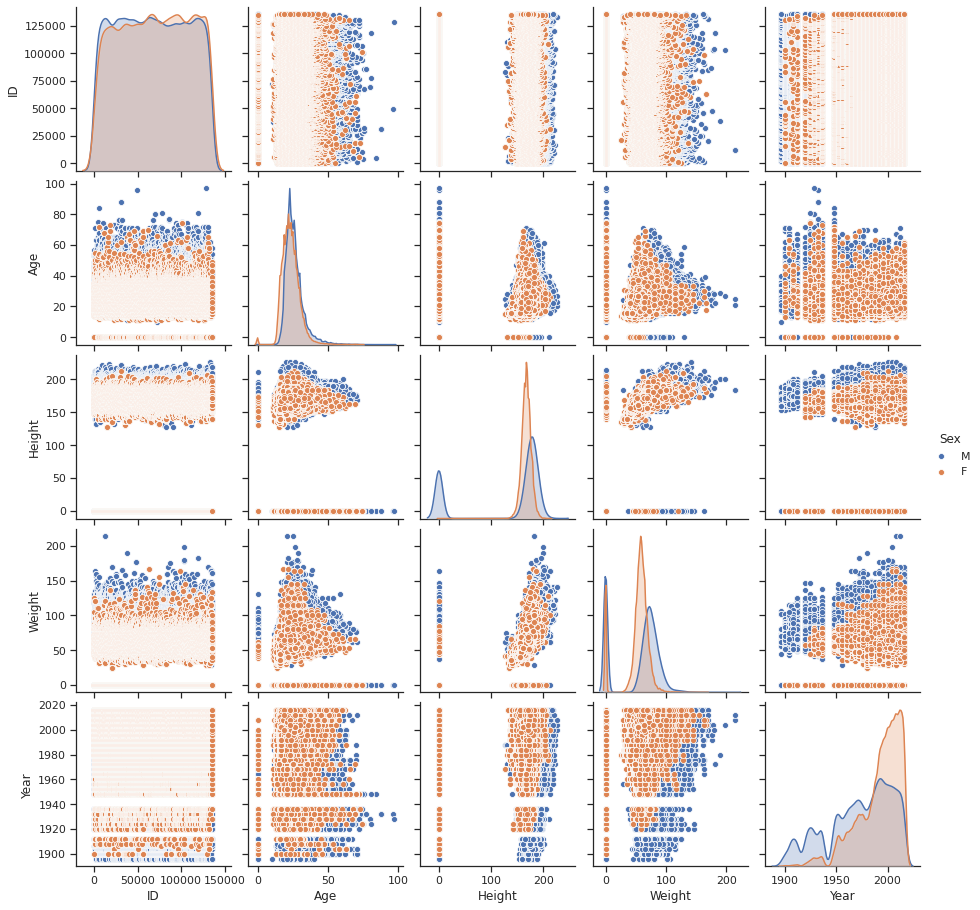

In [27]:
sb.pairplot(data, hue="Sex")

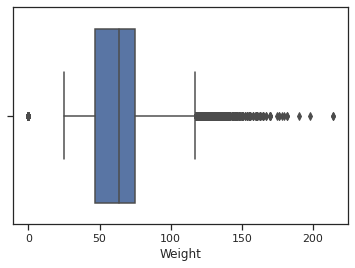

In [28]:
sb.boxplot(x=data['Weight'])

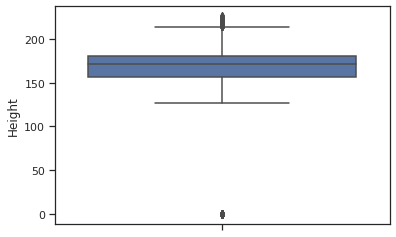

In [29]:
sb.boxplot(y=data['Height'])

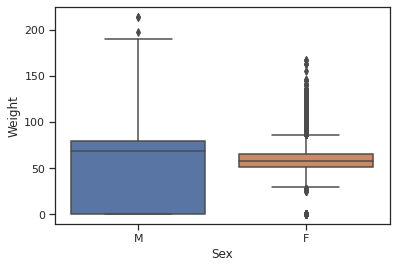

In [30]:
sb.boxplot(x='Sex', y='Weight',data=data)

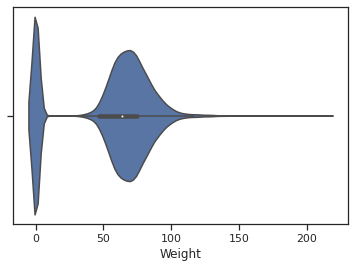

In [31]:
sb.violinplot(x=data['Weight'])

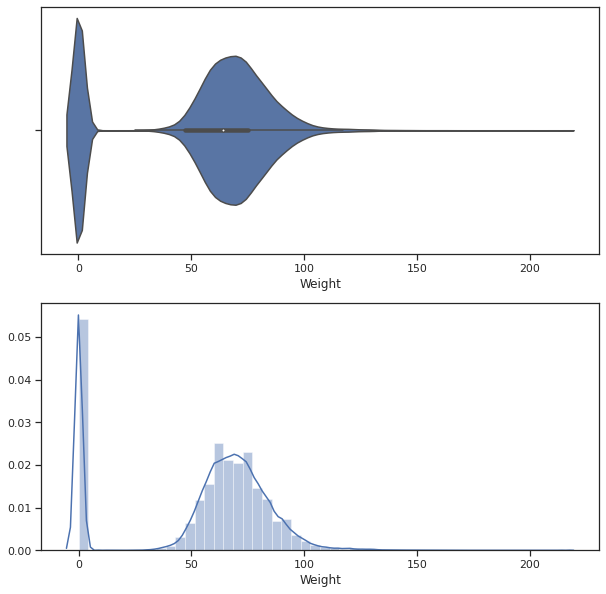

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sb.violinplot(ax=ax[0], x=data['Weight'])
sb.distplot(data['Weight'], ax=ax[1])

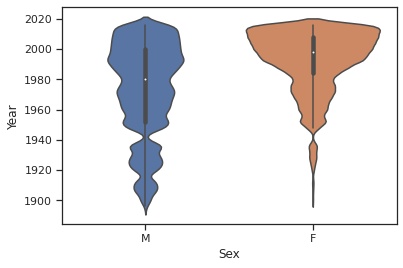

In [33]:
sb.violinplot(x='Sex', y='Year',data=data)

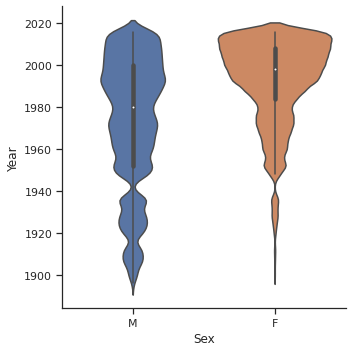

In [34]:
sb.catplot(x='Sex', y='Year', data=data, kind="violin", split=True)

In [35]:
data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,0.000555,0.011114,0.010938,0.011885
Age,0.000555,1.000000,0.086514,0.114378,0.094453
Height,0.011114,0.086514,1.000000,0.899466,0.652054
Weight,0.010938,0.114378,0.899466,1.000000,0.622125
Year,0.011885,0.094453,0.652054,0.622125,1.000000


In [36]:
data.corr(method='pearson')

,ID,Age,Height,Weight,Year
ID,1.000000,0.000555,0.011114,0.010938,0.011885
Age,0.000555,1.000000,0.086514,0.114378,0.094453
Height,0.011114,0.086514,1.000000,0.899466,0.652054
Weight,0.010938,0.114378,0.899466,1.000000,0.622125
Year,0.011885,0.094453,0.652054,0.622125,1.000000


In [37]:
data.corr(method='kendall')

,ID,Age,Height,Weight,Year
ID,1.000000,-0.000083,0.001710,0.002794,0.008940
Age,-0.000083,1.000000,0.077636,0.104872,0.057767
Height,0.001710,0.077636,1.000000,0.751348,0.316010
Weight,0.002794,0.104872,0.751348,1.000000,0.308999
Year,0.008940,0.057767,0.316010,0.308999,1.000000


In [38]:
data.corr(method='spearman')

,ID,Age,Height,Weight,Year
ID,1.000000,-0.000118,0.002461,0.004066,0.013191
Age,-0.000118,1.000000,0.105464,0.140278,0.078540
Height,0.002461,0.105464,1.000000,0.884870,0.446163
Weight,0.004066,0.140278,0.884870,1.000000,0.440047
Year,0.013191,0.078540,0.446163,0.440047,1.000000


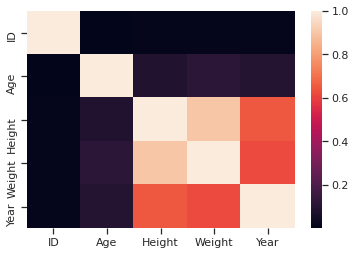

In [39]:
sb.heatmap(data.corr())

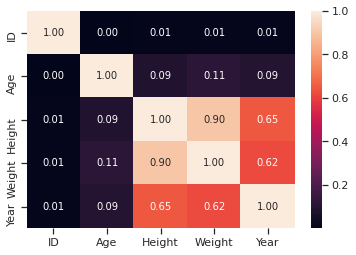

In [40]:
sb.heatmap(data.corr(), annot=True, fmt='.2f')

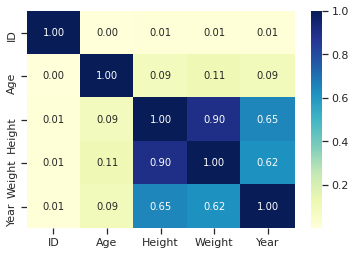

In [41]:
sb.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

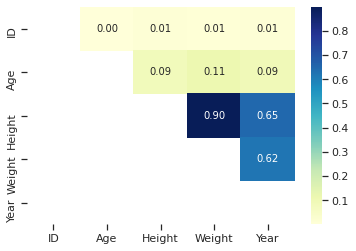

In [42]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sb.heatmap(data.corr(), mask=mask, cmap='YlGnBu', annot=True, fmt='.2f')

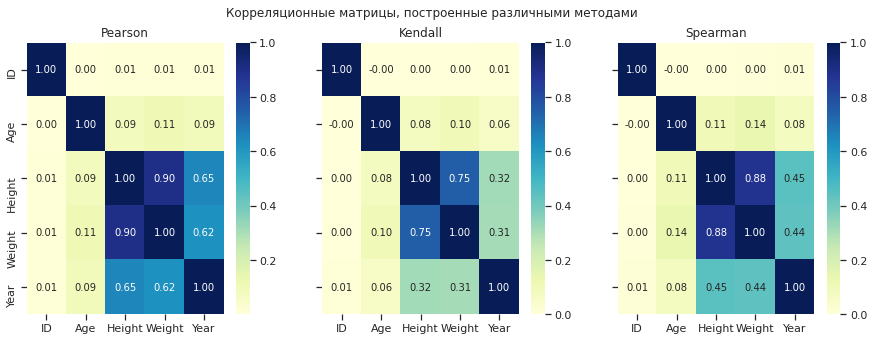

In [43]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sb.heatmap(data.corr(method='pearson'), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sb.heatmap(data.corr(method='kendall'), ax=ax[1],cmap='YlGnBu', annot=True, fmt='.2f')
sb.heatmap(data.corr(method='spearman'), ax=ax[2], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')